In [1]:
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import re

In [2]:
#file path to data
file_path = os.path.join(os.getcwd(),"KDD-Cup","data")
data = [float(i.strip()) for i in open(os.path.join(file_path,os.listdir(file_path)[1])).readlines()]

In [3]:
def visualize_data(datafilename,data):
    fig,ax = plt.subplots(1,1,figsize = (15,15))
    test_data_start_pt = int(re.findall(r'[0-9]*.txt',datafilename)[0].split('.')[0])
    datasize = len(data)
    ax.plot(list(range(0,test_data_start_pt)),data[:test_data_start_pt],'b')
    ax.plot(list(range(test_data_start_pt,datasize)),data[test_data_start_pt:datasize],'r')


In [4]:
def return_normal_anoalous_data(datafilename,data):
    test_data_start_pt = int(re.findall(r'[0-9]*.txt',datafilename)[0].split('.')[0])
    return data[:test_data_start_pt], data[test_data_start_pt:len(data)]

In [28]:
def find_boundaries(datafilename,data):
    test_data_start_pt = int(re.findall(r'[0-9]*.txt',datafilename)[0].split('.')[0])
    #finding the mean and standard deviation that maximizes the likelihood of the observed training data
    #as we assume normal distribution, its simply mean and sd
    data_training = np.array(data[:test_data_start_pt])
    mean = np.mean(data_training)
    sd = np.std(data_training)
    #assuming normal distribution
    #3 sd away from mean covers 99.7% of data
    left = mean - 3*sd
    right = mean + 3*sd
    return left,right,test_data_start_pt

In [18]:
def return_anamolous_points(data,test_data_start_pt,left_boundary,right_boundary):
    data_test = np.array(data[test_data_start_pt:])
    anomalous_locations = np.concatenate((np.where(data_test < left_boundary)[0],np.where(data_test > right_boundary)[0]))
    return anomalous_locations
  

In [31]:
left_boundary,right_boundary,test_data_start_pt = find_boundaries(datafilename = os.listdir(file_path)[1],data = data)
anomaly_positions = return_anamolous_points(data,test_data_start_pt,left_boundary,right_boundary)
anomaly_positions


array([  103,   104,   105, ..., 41535, 41765, 41766], dtype=int64)

In [49]:
def visualize_data_with_anomaly_pts(datafilename,data,anomaly_positions):
    fig,ax = plt.subplots(1,1,figsize = (15,15))
    test_data_start_pt = int(re.findall(r'[0-9]*.txt',datafilename)[0].split('.')[0])
    datasize = len(data)
    ax.plot(list(range(0,test_data_start_pt)),data[:test_data_start_pt],'b')
    ax.plot(list(range(test_data_start_pt,datasize)),data[test_data_start_pt:],'g')
    anomaly_positions = anomaly_positions + test_data_start_pt
    ax.scatter(anomaly_positions,data[anomaly_positions],color = 'r')

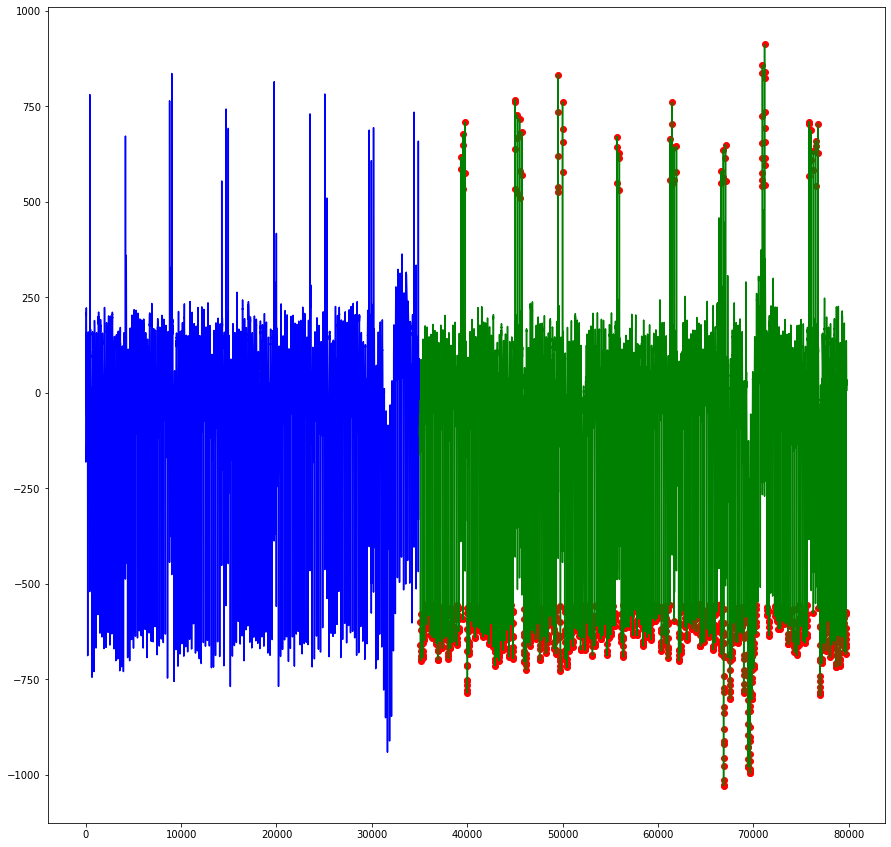

In [50]:
visualize_data_with_anomaly_pts(os.listdir(file_path)[1],data,anomaly_positions)

In [51]:
data[anomaly_positions]

array([-70.192515, -81.990395, -85.608116, ..., 223.47657 ,  18.118285,
        17.571862])

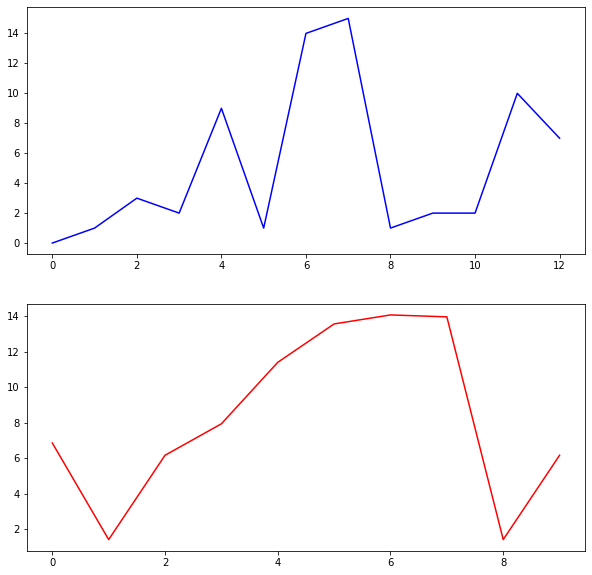

In [19]:
from dao import matrixprofile_bruteforce
import matplotlib.pyplot as plt
time_series = [0, 1, 3, 2, 9, 1, 14, 15, 1, 2, 2, 10, 7]
n = len(time_series)
m = 4

results_dict = matrixprofile_bruteforce.calculate_matrix_profile(time_series,m)
fig,ax = plt.subplots(2,1,figsize = (10,10))
ax[0].plot(range(len(time_series)),time_series, color = 'b')
ax[1].plot([i for i in results_dict],[results_dict[i] for i in results_dict], color = 'r')

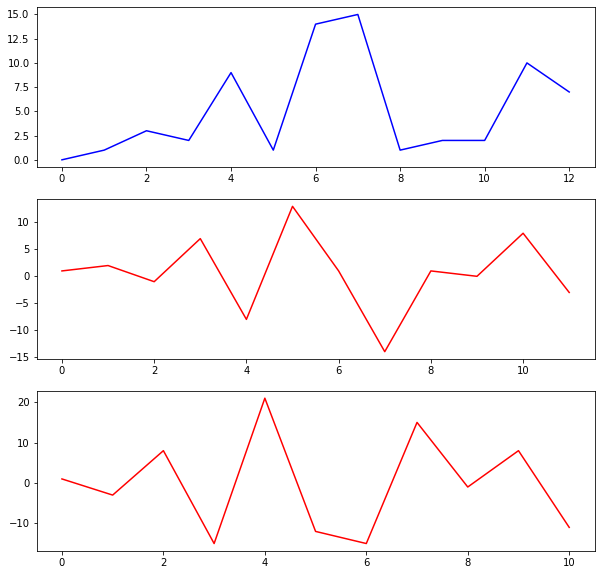

In [22]:
from dao import timeseries_difference
first_difference = timeseries_difference.calculate_difference(time_series)
second_difference = timeseries_difference.calculate_difference(first_difference)
fig,ax = plt.subplots(3,1,figsize = (10,10))
ax[0].plot(range(len(time_series)),time_series, color = 'b')
ax[1].plot(range(len(first_difference)),first_difference, color = 'r')
ax[2].plot(range(len(second_difference)),second_difference, color = 'r')

In [21]:
print(time_series)
print(first_difference)

[0, 1, 3, 2, 9, 1, 14, 15, 1, 2, 2, 10, 7]
[  1   2  -1   7  -8  13   1 -14   1   0   8  -3]
